## Práctica
El archivo `data/b14_enigh2020_gasto.xlsx` contiene registros de los gastos en una muestra de hogares en la zona metropolitana de Monterrey en 2020. Aplica un análisis factorial exploratorio cubriendo los siguientes puntos:
1. Importas las librerías necesarias
2. Carga el archivo con los datos
3. Prepara los datos eliminando filas con valores faltantes y estandarizando las variables
4. Evalúa la aplicabilidad del análisis factorial exploratorio, aplicando la prueba de esfericidad de Bartlett y obteniendo el indicador KMO. Interpreta los resultados.
5. Determina el número óptimo de factores mediante el criterio Kaiser y el análisis del scree plot.
6. Realiza un análisis factorial con rotación varimax mediante el método 'principal'.
7. Identifica si alguna de las comunalidades es menor 0.30
8. Obtén la matriz de cargas factoriales.
9. Identifica con qué se relaciona cada factor, es decir, "nombra" cada factor.

In [1]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel('data/b14_enigh2020_gasto.xlsx')
df.columns

Index(['cereales', 'carnes', 'leche', 'huevo', 'verduras', 'agua', 'energia',
       'limpieza', 'cuidados', 'transporte', 'comunica'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cereales    2332 non-null   float64
 1   carnes      2332 non-null   float64
 2   leche       2332 non-null   float64
 3   huevo       2332 non-null   float64
 4   verduras    2332 non-null   float64
 5   agua        2332 non-null   float64
 6   energia     2332 non-null   float64
 7   limpieza    2332 non-null   float64
 8   cuidados    2332 non-null   float64
 9   transporte  2332 non-null   float64
 10  comunica    2332 non-null   float64
dtypes: float64(11)
memory usage: 200.5 KB


In [4]:
# Eliminar filas con valores faltantes
df = df.dropna()

In [6]:
# Estandarizar las variables
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [7]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

print('Chi cuadrado \t', calculate_bartlett_sphericity(df)[0])
print('P valor \t', calculate_bartlett_sphericity(df)[1])

Chi cuadrado 	 8279.419500924894
P valor 	 0.0


In [8]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(df[df.columns])
print('KMO score:',kmo_model)

KMO score: 0.732986486776746


### Extracción de factores

In [10]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(rotation='varimax', method='principal')
fa.fit(df)

FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})

### Determinación del número de factores

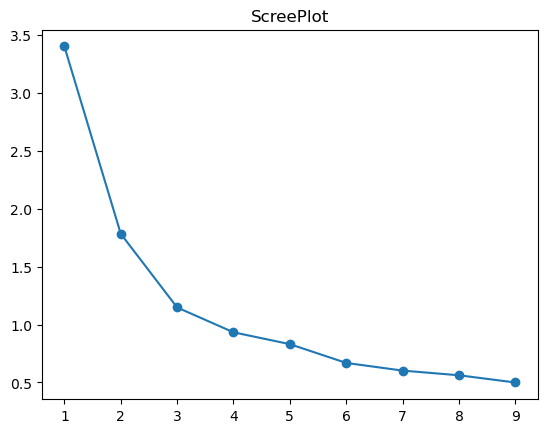

In [21]:
# Cálculo de autovalores
ev, v = fa.get_eigenvalues()

# Scree plot
plt.scatter(range(1, 10), ev[:9])
plt.plot(range(1,10), ev[:9])
plt.title('ScreePlot');

In [22]:
k = 3
fa = FactorAnalyzer(rotation = 'varimax', n_factors=k, method='principal')
fa.fit(df)

FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})

In [23]:
communalities = pd.DataFrame(fa.get_communalities(), index=list(df.columns))
communalities.rename(columns={0: 'Comunalidades'}, inplace=True)
communalities

,Comunalidades
cereales,0.562904
carnes,0.454677
leche,0.508525
huevo,0.350079
verduras,0.558218
agua,0.377348
energia,0.526833
limpieza,0.909787
cuidados,0.923434
transporte,0.518623


In [26]:
fa_loadings = pd.DataFrame(fa.loadings_,
                           columns=['Factor{}'.format(i) for i in range(1, k+1)],
                           index=df.columns)
fa_loadings['Factor_asignado'] = fa_loadings.idxmax(axis=1)
fa_loadings

,Factor1,Factor2,Factor3,Factor_asignado
cereales,0.084838,0.744130,-0.044452,Factor2
carnes,0.344303,0.564730,0.131198,Factor2
leche,0.158796,0.684421,0.121971,Factor2
huevo,-0.085931,0.577236,-0.097432,Factor2
verduras,0.034223,0.704042,0.247734,Factor2
agua,0.558965,0.116389,0.226626,Factor1
energia,0.634915,0.086672,0.340886,Factor1
limpieza,0.225122,0.083925,0.923073,Factor3
cuidados,0.210597,0.064132,0.935398,Factor3
transporte,0.719103,0.038147,0.007691,Factor1


In [27]:
factors = list(fa_loadings.columns[:-1])
table = fa_loadings.sort_values(by='Factor_asignado').style.map(lambda x: 'background-color: yellow' if abs(x) > 0.4 else '', subset=factors)
table 

,Factor1,Factor2,Factor3,Factor_asignado
agua,0.558965,0.116389,0.226626,Factor1
energia,0.634915,0.086672,0.340886,Factor1
transporte,0.719103,0.038147,0.007691,Factor1
comunica,0.793881,0.057040,0.097414,Factor1
cereales,0.084838,0.744130,-0.044452,Factor2
carnes,0.344303,0.564730,0.131198,Factor2
leche,0.158796,0.684421,0.121971,Factor2
huevo,-0.085931,0.577236,-0.097432,Factor2
verduras,0.034223,0.704042,0.247734,Factor2
limpieza,0.225122,0.083925,0.923073,Factor3


Factor 1 = Servicios Basicos
Factor 2 = Despensas
Factor 3 = Igiene